In [204]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

from cellmating.utils import file_traverse, load_from_pkl
from cellmating.io import imread

from script_wlli.mating_feature_extract import extract_mating_features, stack_features

In [2]:
from cellmating.cells import Cell, Cells
from cellmating.mating import Mating
from cellmating.cells import create_cells_from_image, Cells, create_cells_from_tracker
%load_ext autoreload
%autoreload 2

In [3]:
root = "/media/wlli/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")
print("totle images: ", len(file_list))

totle images:  195


In [4]:
file_name = file_list[0]

67


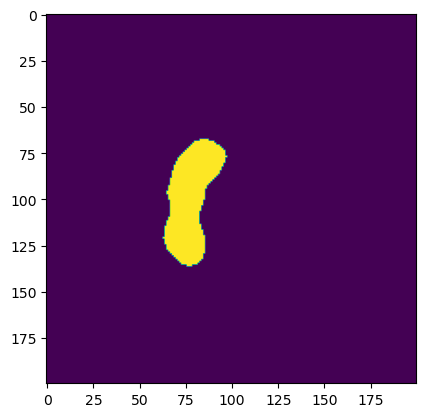

In [254]:
key = int(file_name.split("_")[-1][:-4])
image = imread(file_name)
plt.imshow(image[-1,-2] == key)
g = load_from_pkl(file_name[:-4]+".network")
cells = create_cells_from_image(image[:,-1], g)
key = int(file_name.split("_")[-1][:-4])
key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
print(key)

In [6]:
c_mating = Mating(image=image, cells=cells, center=key, g=g)

In [7]:
### check tree

In [8]:
import networkx as nx

In [79]:
from script_wlli.for_check_result_utils import draw_subgraph

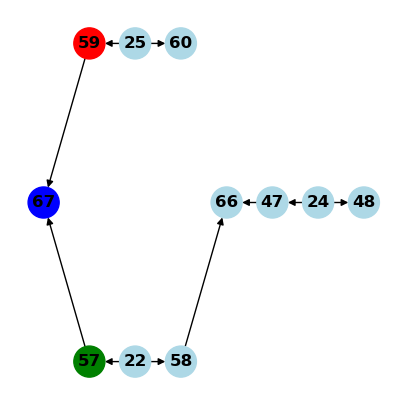

In [80]:
draw_subgraph(g, key, c_mating.p, c_mating.m)

In [81]:
### check one time point

In [82]:
time = 22

In [275]:
data = c_mating.center_cells_potential_pairs(time)

In [93]:
pairs = data[["p_id", "m_id", "flag"]].drop_duplicates()
print("pairs:", pairs.shape[0])
pairs

pairs: 6


,p_id,m_id,flag
0,59,57,True
1,18,57,False
2,23,57,False
3,51,57,False
4,52,57,False
5,53,57,False


In [281]:
id=0
p, m ,f = pairs.iloc[id]
ep_data = data.iloc[id]

In [303]:
p_dgree = ep_data.p_angle*180/np.pi
m_dgree = ep_data.m_angle*180/np.pi

p_coord = c_mating.cells[p].coordinates(time)[0,0]

In [283]:
from cellmating.plotlib._gray2color import multigray2rgb

In [271]:
show_image = multigray2rgb(image[time, 0:3], axis=0,  colors_channel={"r": 2, "g": 1, "a":0})

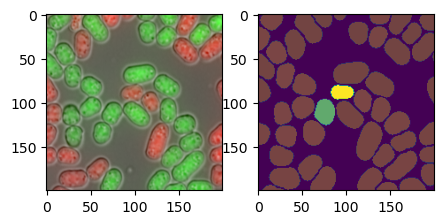

In [294]:
fig, axs = plt.subplots(1,2,figsize=(5, 3))
axs[0].imshow(show_image)
axs[1].imshow((image[time, -1]%1000==p)*1 + (image[time, -1]%1000==m)*2)
axs[1].imshow(image[time, -1], alpha=0.3)